In [37]:
import os
os.chdir('/Users/zhanwenxin/Documents/GitHub/canari')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [38]:
def prophet_linear_trend(t, s, k, m, delta):
    """
    Compute Prophet linear trend: g(t) = (k + a(t)^T delta)t + (m + a(t)^T gamma)

    Parameters:
    - t: array of time values
    - s: array of changepoint times
    - k: initial slope
    - m: initial intercept
    - delta: array of adjustments to slope at changepoints

    Returns:
    - g_t: array of trend values at time t
    """
    t = np.array(t)
    s = np.array(s)
    delta = np.array(delta)
    n_cp = len(s)

    # a(t): (len(t), len(s)) binary matrix, 1 if t > s_j
    A = (t[:, None] > s).astype(float)

    # gamma = -s * delta
    gamma = -s * delta

    # compute g(t)
    g_t = (k + A @ delta) * t + (m + A @ gamma)

    return g_t

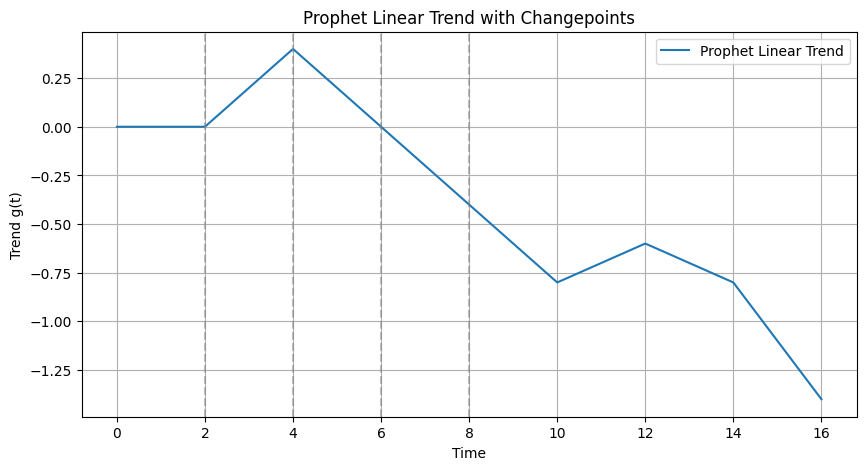

In [39]:
# Time values
t = np.linspace(0, 16, 500)

# Changepoints
s = np.array([2, 4, 6, 8, 10, 12, 14])

# Initial slope and offset
k = 0
m = 0.0

# Slope adjustments at changepoints
delta = np.array([0.2, -0.4, 0, 0, 0.3, -0.2, -0.2])

# Compute trend
g = prophet_linear_trend(t, s, k, m, delta)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(t, g, label="Prophet Linear Trend")
plt.axvline(x=2, linestyle='--', color='gray', alpha=0.5)
plt.axvline(x=4, linestyle='--', color='gray', alpha=0.5)
plt.axvline(x=6, linestyle='--', color='gray', alpha=0.5)
plt.axvline(x=8, linestyle='--', color='gray', alpha=0.5)
plt.title("Prophet Linear Trend with Changepoints")
plt.xlabel("Time")
plt.ylabel("Trend g(t)")
plt.grid(True)
plt.legend()
plt.show()


## Simulate the prior of delta

In [40]:
# draw δj from δj ∼ Laplace(0, τ )
def draw_delta(n_cp, tau):
    """
    Draw slope adjustments from Laplace distribution.

    Parameters:
    - n_cp: number of changepoints
    - tau: scale parameter for Laplace distribution

    Returns:
    - delta: array of slope adjustments
    """
    delta = np.random.laplace(0, tau, n_cp)
    return delta

In [41]:
# Plot Laplace distribution given that tao = 0.05
def plot_laplace_distribution(tau, n_samples=1000):
    """
    Plot Laplace distribution.

    Parameters:
    - tau: scale parameter for Laplace distribution
    - n_samples: number of samples to draw
    """
    delta = draw_delta(n_samples, tau)
    
    plt.figure(figsize=(10, 5))
    plt.hist(delta, bins=30, density=True, alpha=0.6, color='g')
    
    # Plot the PDF of the Laplace distribution
    x = np.linspace(-5*tau, 5*tau, 1000)
    pdf = (1/(2*tau)) * np.exp(-np.abs(x)/tau)
    plt.plot(x, pdf, 'r', linewidth=2)
    
    plt.title(f"Laplace Distribution with tau={tau}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid(True)

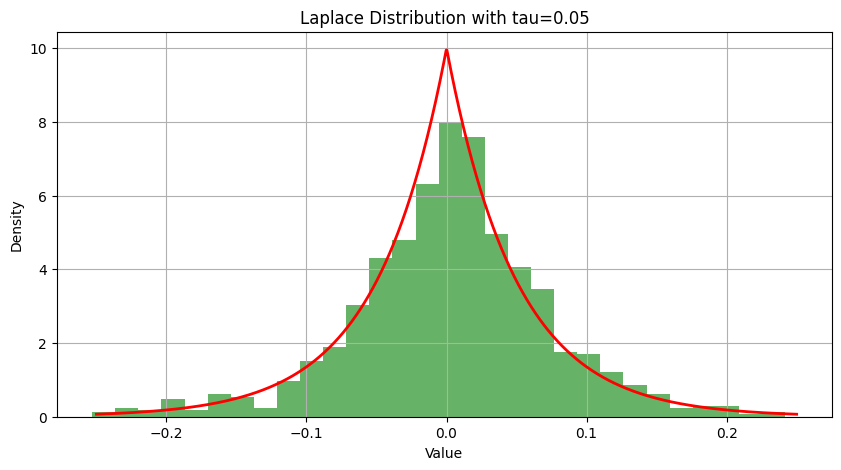

In [42]:
tau = 0.05
# Plot samples and Laplace distribution
plot_laplace_distribution(tau)